# `Practice notebook for univariate analysis using NHANES data`

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [15]:
def line(size: int = 15):
    print("-"*size)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv('data/nhanes-2015-2016.csv')

## `Question 1`

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.


In [56]:
# 1) Relabel the marital status variable to have brief but 
#   informative character labels.

# 2) Construct a frequency table of these values for:
#    2.1) All people;
#    2.2) Then for women only
#    2.3) Then for men only.

# 3) Construct these three frequency tables using only people whose 
#    age is between 30 and 40.

In [55]:
da.columns


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx', 'RIAGENDRx'],
      dtype='object')

In [12]:
raw_data = da.DMDMARTL
raw_data.value_counts()


DMDMARTL
1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: count, dtype: int64

In [18]:
status_missing = pd.isnull(raw_data)
print("Information about the missing values in the DMDEDUC2 column:")
line(60)
print(status_missing.value_counts())
line(60)


Information about the missing values in the DMDEDUC2 column:
------------------------------------------------------------
DMDMARTL
False    5474
True      261
Name: count, dtype: int64
------------------------------------------------------------


In [19]:
# Relabel the marital status variable to have brief but informative character labels.
da['DMDMARTLx'] = raw_data.replace(
                                    {
                                        1: "Married", 
                                        2: "Widowed", 
                                        3: "Divorced", 
                                        4: "Separated", 
                                        5: "Never married", 
                                        6: "Living with partner", 
                                        77: "Refused", 
                                        99: "Don't know"
                                    }	
                                )
data_x = da.DMDMARTLx
data_x.value_counts()


DMDMARTLx
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: count, dtype: int64

In [21]:
# Construct a frequency table of these values for all people, then for women only, and for men only.

# DMDMARTL : Marital Status
# RIDAGEYR : Age in years at screening
# RIAGENDR : Gender

da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx'],
      dtype='object')

In [26]:
da.DMDMARTL.value_counts()

DMDMARTL
1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: count, dtype: int64

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


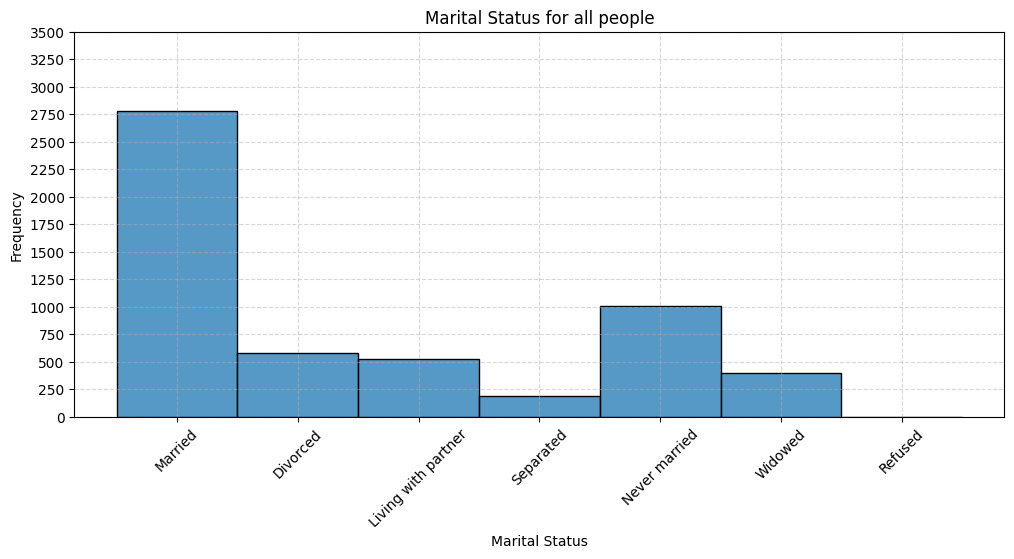

In [50]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = da,
        x = 'DMDMARTLx',
        kde=False
).set(
        title = 'Marital Status for all people',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

Y = list(da.DMDMARTLx.value_counts())
y_max = max(Y)
y_min = min(Y)
desvio_padrao = np.std(Y)
y_add = 250

plt.xticks(rotation=45)
plt.yticks(np.arange(0, y_max + desvio_padrao, y_add))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [51]:
da['RIAGENDRx'] = da.RIAGENDR.replace(
                                        {
                                            1: "Male",
                                            2: "Female"
                                        }
                                    )


c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


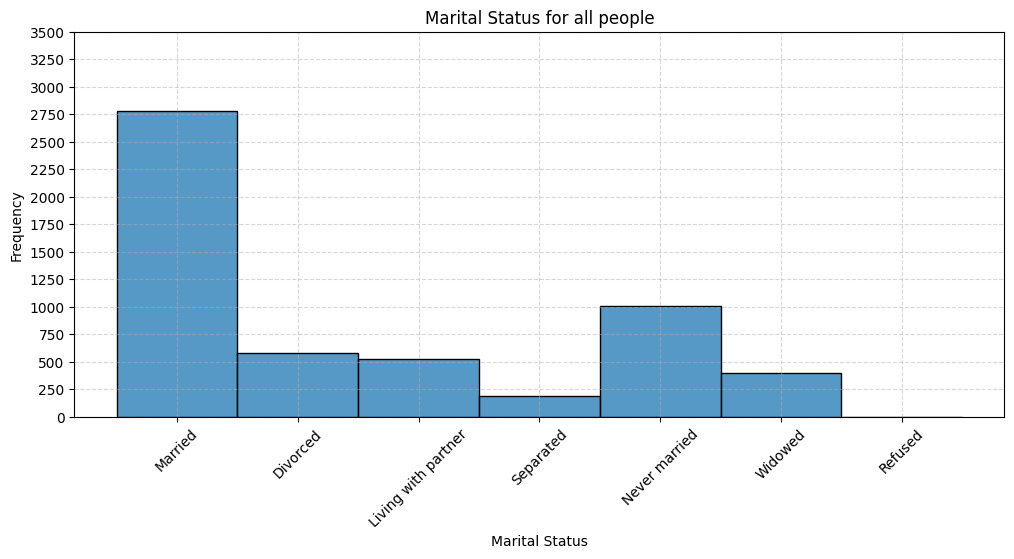

In [53]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = da,
        x = 'DMDMARTLx',
        kde=False
).set(
        title = 'Marital Status for all people',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

Y = list(da.DMDMARTLx.value_counts())
y_max = max(Y)
y_min = min(Y)
desvio_padrao = np.std(Y)
y_add = 250

plt.xticks(rotation=45)
plt.yticks(np.arange(0, y_max + desvio_padrao, y_add))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [57]:
data_woman = da[ da['RIAGENDRx'] == 'Female' ]
data_man = da[ da['RIAGENDRx'] == 'Male']


In [62]:
data_man.DMDMARTLx.value_counts()

DMDMARTLx
Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: count, dtype: int64

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


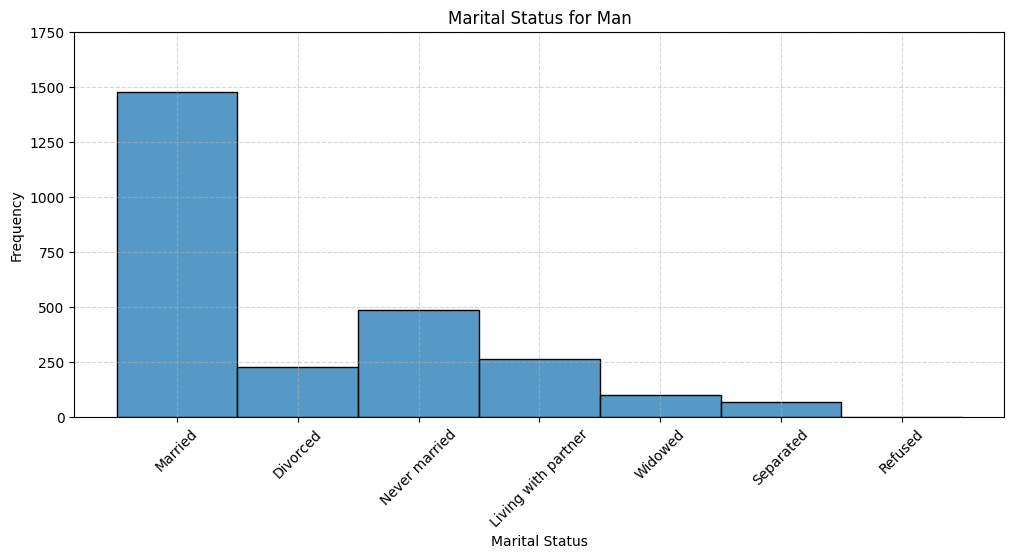

In [78]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = data_man,
        x = 'DMDMARTLx',
        kde=False
).set(
        title = 'Marital Status for Man',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

Y = list(data_man.DMDMARTLx.value_counts())
y_max = max(Y)
y_min = min(Y)
desvio_padrao = np.std(Y)
y_add = 250

plt.xticks(rotation=45)
plt.yticks(np.arange(0, y_max + desvio_padrao, y_add))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


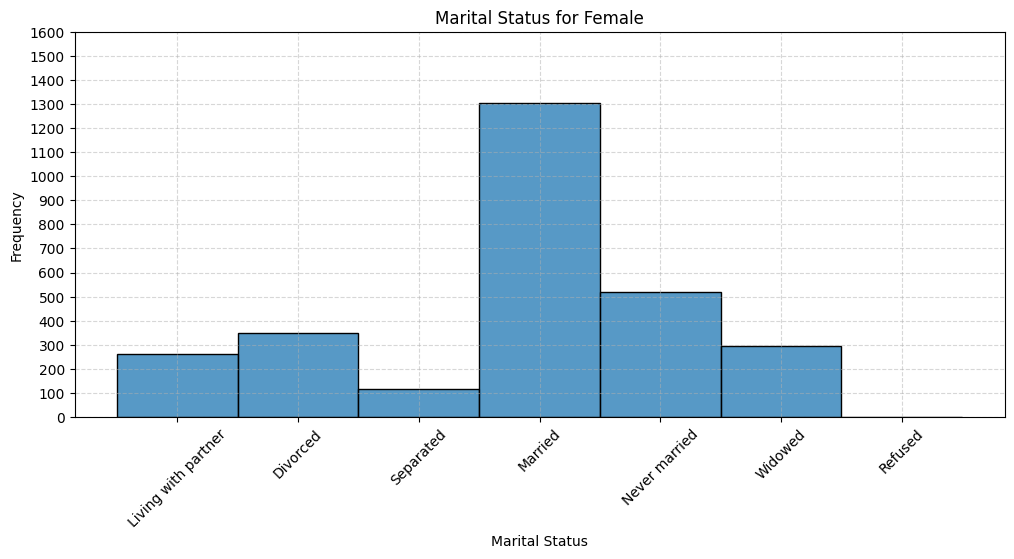

In [79]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = data_woman,
        x = 'DMDMARTLx',
        kde=False
).set(
        title = 'Marital Status for Female',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

Y = list(data_woman.DMDMARTLx.value_counts())
y_max = max(Y)
y_min = min(Y)
desvio_padrao = np.std(Y)
y_add = 100

plt.xticks(rotation=45)
plt.yticks(np.arange(0, y_max + desvio_padrao, y_add))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-vi

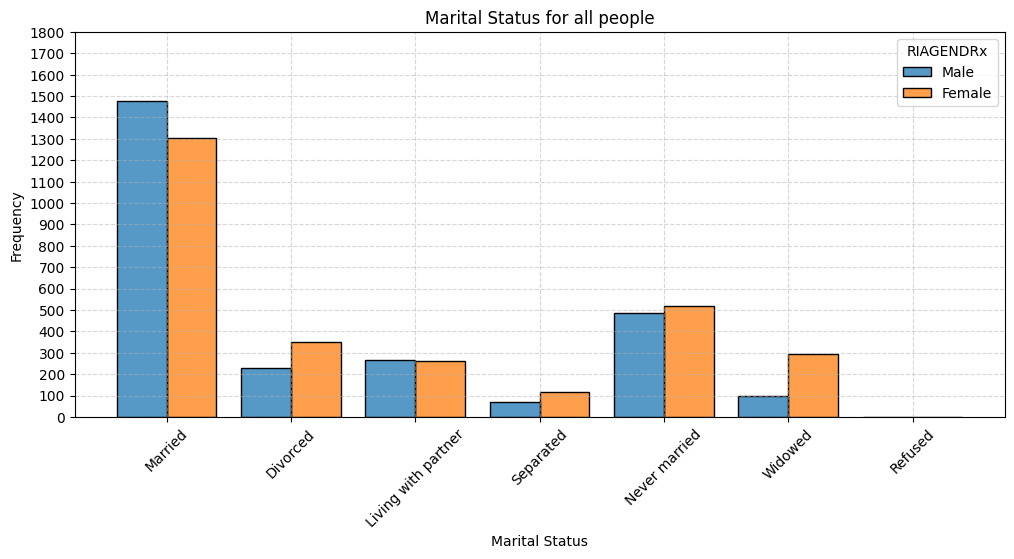

In [92]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = da,
        x = 'DMDMARTLx',
        hue='RIAGENDRx',
        kde=False,
        multiple='dodge',
        shrink=.8
).set(
        title = 'Marital Status for all people',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

add = 100
step = 100

plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1750 + add, step))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [98]:
data = da[ (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) ]
data.DMDMARTLx.value_counts()


DMDMARTLx
Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: count, dtype: int64

In [100]:
missing = pd.isnull(data.DMDMARTLx)
missing.value_counts()


DMDMARTLx
False    1026
Name: count, dtype: int64

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-vi

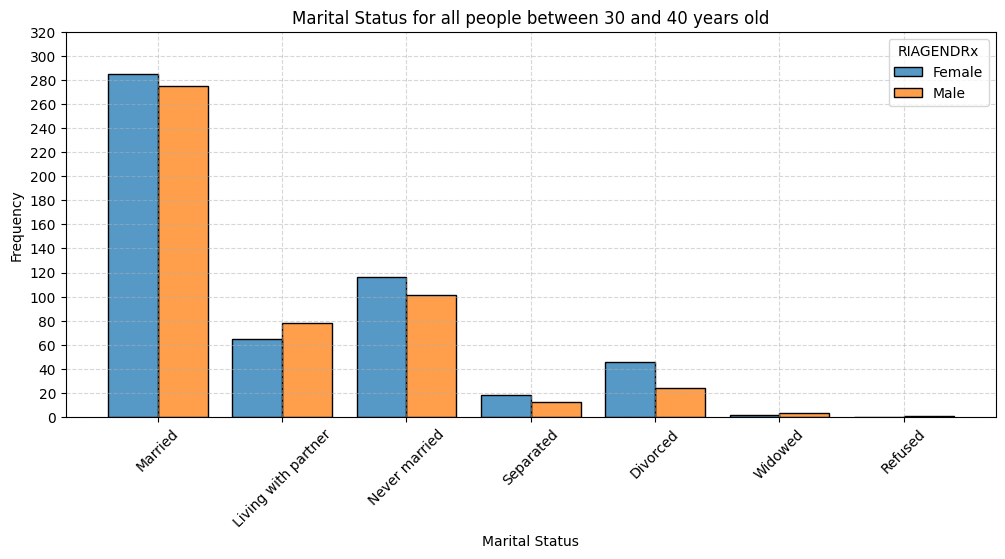

In [106]:
plt.figure(figsize=(12, 5))
sns.histplot(
        data = data,
        x = 'DMDMARTLx',
        hue='RIAGENDRx',
        kde=False,
        multiple='dodge',
        shrink=.8
).set(
        title = 'Marital Status for all people between 30 and 40 years old',
        xlabel = 'Marital Status',
        ylabel = 'Frequency'
)

add = 0
step = 20

plt.xticks(rotation=45)
plt.yticks(np.arange(0, 340 + add, step))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

[resolução 1](https://github.com/tamalmuk21/Stat_with_python/blob/master/stat/stat_with_python.ipynb)<br>
[resolução 2](https://github.com/RashbirSingh/Understanding_and_Visualizing_Data_with_Python/tree/master/week2)<br>
[resolução 3](https://github.com/tamalmuk21/Stat_with_python/blob/master/inferencestat/utf-8''week2_assessment.ipynb)